In [2]:
import polars as ps

pokémon = ps.read_csv("./pokémon/Pokemon.csv")
pokémon

shape: (800, 13)
┌─────┬───────────────────────┬─────────┬────────┬───┬─────────┬───────┬────────────┬───────────┐
│ #   ┆ Name                  ┆ Type 1  ┆ Type 2 ┆ … ┆ Sp. Def ┆ Speed ┆ Generation ┆ Legendary │
│ --- ┆ ---                   ┆ ---     ┆ ---    ┆   ┆ ---     ┆ ---   ┆ ---        ┆ ---       │
│ i64 ┆ str                   ┆ str     ┆ str    ┆   ┆ i64     ┆ i64   ┆ i64        ┆ bool      │
╞═════╪═══════════════════════╪═════════╪════════╪═══╪═════════╪═══════╪════════════╪═══════════╡
│ 1   ┆ Bulbasaur             ┆ Grass   ┆ Poison ┆ … ┆ 65      ┆ 45    ┆ 1          ┆ false     │
│ 2   ┆ Ivysaur               ┆ Grass   ┆ Poison ┆ … ┆ 80      ┆ 60    ┆ 1          ┆ false     │
│ 3   ┆ Venusaur              ┆ Grass   ┆ Poison ┆ … ┆ 100     ┆ 80    ┆ 1          ┆ false     │
│ 3   ┆ VenusaurMega Venusaur ┆ Grass   ┆ Poison ┆ … ┆ 120     ┆ 80    ┆ 1          ┆ false     │
│ 4   ┆ Charmander            ┆ Fire    ┆ null   ┆ … ┆ 50      ┆ 65    ┆ 1          ┆ false     │
│ …   ┆ …                     ┆ …       ┆ …      ┆ … ┆ …       ┆ …     ┆ …          ┆ …         │
│ 719 ┆ Diancie               ┆ Rock    ┆ Fairy  ┆ … ┆ 150     ┆ 50    ┆ 6          ┆ true      │
│ 719 ┆ DiancieMega Diancie   ┆ Rock    ┆ Fairy  ┆ … ┆ 110     ┆ 110   ┆ 6          ┆ true      │
│ 720 ┆ HoopaHoopa Confined   ┆ Psychic ┆ Ghost  ┆ … ┆ 130     ┆ 70    ┆ 6          ┆ true      │
│ 720 ┆ HoopaHoopa Unbound    ┆ Psychic ┆ Dark   ┆ … ┆ 130     ┆ 80    ┆ 6          ┆ true      │
│ 721 ┆ Volcanion             ┆ Fire    ┆ Water  ┆ … ┆ 90      ┆ 70    ┆ 6          ┆ true      │
└─────┴───────────────────────┴─────────┴────────┴───┴─────────┴───────┴────────────┴───────────┘

In [3]:
pokémon.sort(ps.col("HP")).tail(1)

shape: (1, 13)
┌─────┬─────────┬────────┬────────┬───┬─────────┬───────┬────────────┬───────────┐
│ #   ┆ Name    ┆ Type 1 ┆ Type 2 ┆ … ┆ Sp. Def ┆ Speed ┆ Generation ┆ Legendary │
│ --- ┆ ---     ┆ ---    ┆ ---    ┆   ┆ ---     ┆ ---   ┆ ---        ┆ ---       │
│ i64 ┆ str     ┆ str    ┆ str    ┆   ┆ i64     ┆ i64   ┆ i64        ┆ bool      │
╞═════╪═════════╪════════╪════════╪═══╪═════════╪═══════╪════════════╪═══════════╡
│ 242 ┆ Blissey ┆ Normal ┆ null   ┆ … ┆ 135     ┆ 55    ┆ 2          ┆ false     │
└─────┴─────────┴────────┴────────┴───┴─────────┴───────┴────────────┴───────────┘

In [4]:
from polars import col

pokémon.select(ps.col("Type 2").fill_null(ps.col("Type 1")))
pnn = pokémon.with_columns([
    ps.when(col("Type 2").is_null()).then(col("Type 1")).otherwise(col("Type 2")).alias("Type 2")
])

pnn

shape: (800, 13)
┌─────┬───────────────────────┬─────────┬────────┬───┬─────────┬───────┬────────────┬───────────┐
│ #   ┆ Name                  ┆ Type 1  ┆ Type 2 ┆ … ┆ Sp. Def ┆ Speed ┆ Generation ┆ Legendary │
│ --- ┆ ---                   ┆ ---     ┆ ---    ┆   ┆ ---     ┆ ---   ┆ ---        ┆ ---       │
│ i64 ┆ str                   ┆ str     ┆ str    ┆   ┆ i64     ┆ i64   ┆ i64        ┆ bool      │
╞═════╪═══════════════════════╪═════════╪════════╪═══╪═════════╪═══════╪════════════╪═══════════╡
│ 1   ┆ Bulbasaur             ┆ Grass   ┆ Poison ┆ … ┆ 65      ┆ 45    ┆ 1          ┆ false     │
│ 2   ┆ Ivysaur               ┆ Grass   ┆ Poison ┆ … ┆ 80      ┆ 60    ┆ 1          ┆ false     │
│ 3   ┆ Venusaur              ┆ Grass   ┆ Poison ┆ … ┆ 100     ┆ 80    ┆ 1          ┆ false     │
│ 3   ┆ VenusaurMega Venusaur ┆ Grass   ┆ Poison ┆ … ┆ 120     ┆ 80    ┆ 1          ┆ false     │
│ 4   ┆ Charmander            ┆ Fire    ┆ Fire   ┆ … ┆ 50      ┆ 65    ┆ 1          ┆ false     │
│ …   ┆ …                     ┆ …       ┆ …      ┆ … ┆ …       ┆ …     ┆ …          ┆ …         │
│ 719 ┆ Diancie               ┆ Rock    ┆ Fairy  ┆ … ┆ 150     ┆ 50    ┆ 6          ┆ true      │
│ 719 ┆ DiancieMega Diancie   ┆ Rock    ┆ Fairy  ┆ … ┆ 110     ┆ 110   ┆ 6          ┆ true      │
│ 720 ┆ HoopaHoopa Confined   ┆ Psychic ┆ Ghost  ┆ … ┆ 130     ┆ 70    ┆ 6          ┆ true      │
│ 720 ┆ HoopaHoopa Unbound    ┆ Psychic ┆ Dark   ┆ … ┆ 130     ┆ 80    ┆ 6          ┆ true      │
│ 721 ┆ Volcanion             ┆ Fire    ┆ Water  ┆ … ┆ 90      ┆ 70    ┆ 6          ┆ true      │
└─────┴───────────────────────┴─────────┴────────┴───┴─────────┴───────┴────────────┴───────────┘

In [5]:
gen1 = pnn.filter(col("Generation") == 1)
gen1

shape: (166, 13)
┌─────┬───────────────────────┬─────────┬──────────┬───┬─────────┬───────┬────────────┬───────────┐
│ #   ┆ Name                  ┆ Type 1  ┆ Type 2   ┆ … ┆ Sp. Def ┆ Speed ┆ Generation ┆ Legendary │
│ --- ┆ ---                   ┆ ---     ┆ ---      ┆   ┆ ---     ┆ ---   ┆ ---        ┆ ---       │
│ i64 ┆ str                   ┆ str     ┆ str      ┆   ┆ i64     ┆ i64   ┆ i64        ┆ bool      │
╞═════╪═══════════════════════╪═════════╪══════════╪═══╪═════════╪═══════╪════════════╪═══════════╡
│ 1   ┆ Bulbasaur             ┆ Grass   ┆ Poison   ┆ … ┆ 65      ┆ 45    ┆ 1          ┆ false     │
│ 2   ┆ Ivysaur               ┆ Grass   ┆ Poison   ┆ … ┆ 80      ┆ 60    ┆ 1          ┆ false     │
│ 3   ┆ Venusaur              ┆ Grass   ┆ Poison   ┆ … ┆ 100     ┆ 80    ┆ 1          ┆ false     │
│ 3   ┆ VenusaurMega Venusaur ┆ Grass   ┆ Poison   ┆ … ┆ 120     ┆ 80    ┆ 1          ┆ false     │
│ 4   ┆ Charmander            ┆ Fire    ┆ Fire     ┆ … ┆ 50      ┆ 65    ┆ 1          ┆ false     │
│ …   ┆ …                     ┆ …       ┆ …        ┆ … ┆ …       ┆ …     ┆ …          ┆ …         │
│ 149 ┆ Dragonite             ┆ Dragon  ┆ Flying   ┆ … ┆ 100     ┆ 80    ┆ 1          ┆ false     │
│ 150 ┆ Mewtwo                ┆ Psychic ┆ Psychic  ┆ … ┆ 90      ┆ 130   ┆ 1          ┆ true      │
│ 150 ┆ MewtwoMega Mewtwo X   ┆ Psychic ┆ Fighting ┆ … ┆ 100     ┆ 130   ┆ 1          ┆ true      │
│ 150 ┆ MewtwoMega Mewtwo Y   ┆ Psychic ┆ Psychic  ┆ … ┆ 120     ┆ 140   ┆ 1          ┆ true      │
│ 151 ┆ Mew                   ┆ Psychic ┆ Psychic  ┆ … ┆ 100     ┆ 100   ┆ 1          ┆ false     │
└─────┴───────────────────────┴─────────┴──────────┴───┴─────────┴───────┴────────────┴───────────┘

In [6]:
no_megas = pnn.filter(~col("Name").str.contains("Mega "))
no_megas

shape: (752, 13)
┌─────┬─────────────────────┬─────────┬────────┬───┬─────────┬───────┬────────────┬───────────┐
│ #   ┆ Name                ┆ Type 1  ┆ Type 2 ┆ … ┆ Sp. Def ┆ Speed ┆ Generation ┆ Legendary │
│ --- ┆ ---                 ┆ ---     ┆ ---    ┆   ┆ ---     ┆ ---   ┆ ---        ┆ ---       │
│ i64 ┆ str                 ┆ str     ┆ str    ┆   ┆ i64     ┆ i64   ┆ i64        ┆ bool      │
╞═════╪═════════════════════╪═════════╪════════╪═══╪═════════╪═══════╪════════════╪═══════════╡
│ 1   ┆ Bulbasaur           ┆ Grass   ┆ Poison ┆ … ┆ 65      ┆ 45    ┆ 1          ┆ false     │
│ 2   ┆ Ivysaur             ┆ Grass   ┆ Poison ┆ … ┆ 80      ┆ 60    ┆ 1          ┆ false     │
│ 3   ┆ Venusaur            ┆ Grass   ┆ Poison ┆ … ┆ 100     ┆ 80    ┆ 1          ┆ false     │
│ 4   ┆ Charmander          ┆ Fire    ┆ Fire   ┆ … ┆ 50      ┆ 65    ┆ 1          ┆ false     │
│ 5   ┆ Charmeleon          ┆ Fire    ┆ Fire   ┆ … ┆ 65      ┆ 80    ┆ 1          ┆ false     │
│ …   ┆ …                   ┆ …       ┆ …      ┆ … ┆ …       ┆ …     ┆ …          ┆ …         │
│ 718 ┆ Zygarde50% Forme    ┆ Dragon  ┆ Ground ┆ … ┆ 95      ┆ 95    ┆ 6          ┆ true      │
│ 719 ┆ Diancie             ┆ Rock    ┆ Fairy  ┆ … ┆ 150     ┆ 50    ┆ 6          ┆ true      │
│ 720 ┆ HoopaHoopa Confined ┆ Psychic ┆ Ghost  ┆ … ┆ 130     ┆ 70    ┆ 6          ┆ true      │
│ 720 ┆ HoopaHoopa Unbound  ┆ Psychic ┆ Dark   ┆ … ┆ 130     ┆ 80    ┆ 6          ┆ true      │
│ 721 ┆ Volcanion           ┆ Fire    ┆ Water  ┆ … ┆ 90      ┆ 70    ┆ 6          ┆ true      │
└─────┴─────────────────────┴─────────┴────────┴───┴─────────┴───────┴────────────┴───────────┘

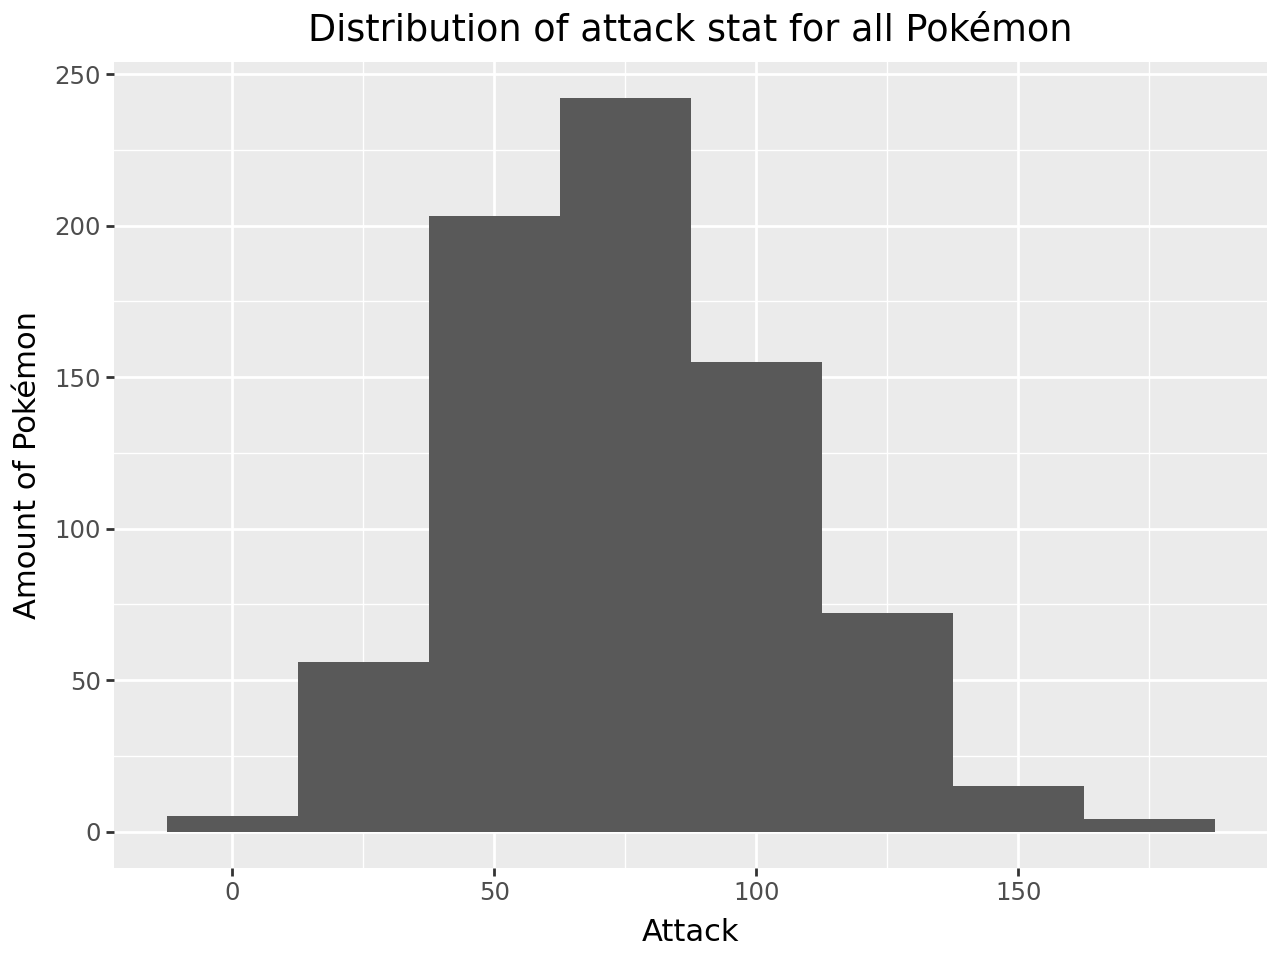

In [24]:
from plotnine import ggplot, aes, geom_histogram, labs

(
    ggplot(no_megas.to_pandas())
    + aes(x="Attack") 
    + geom_histogram(bins=(200/25))
    + labs(title="Distribution of attack stat for all Pokémon", y="Amount of Pokémon")
)


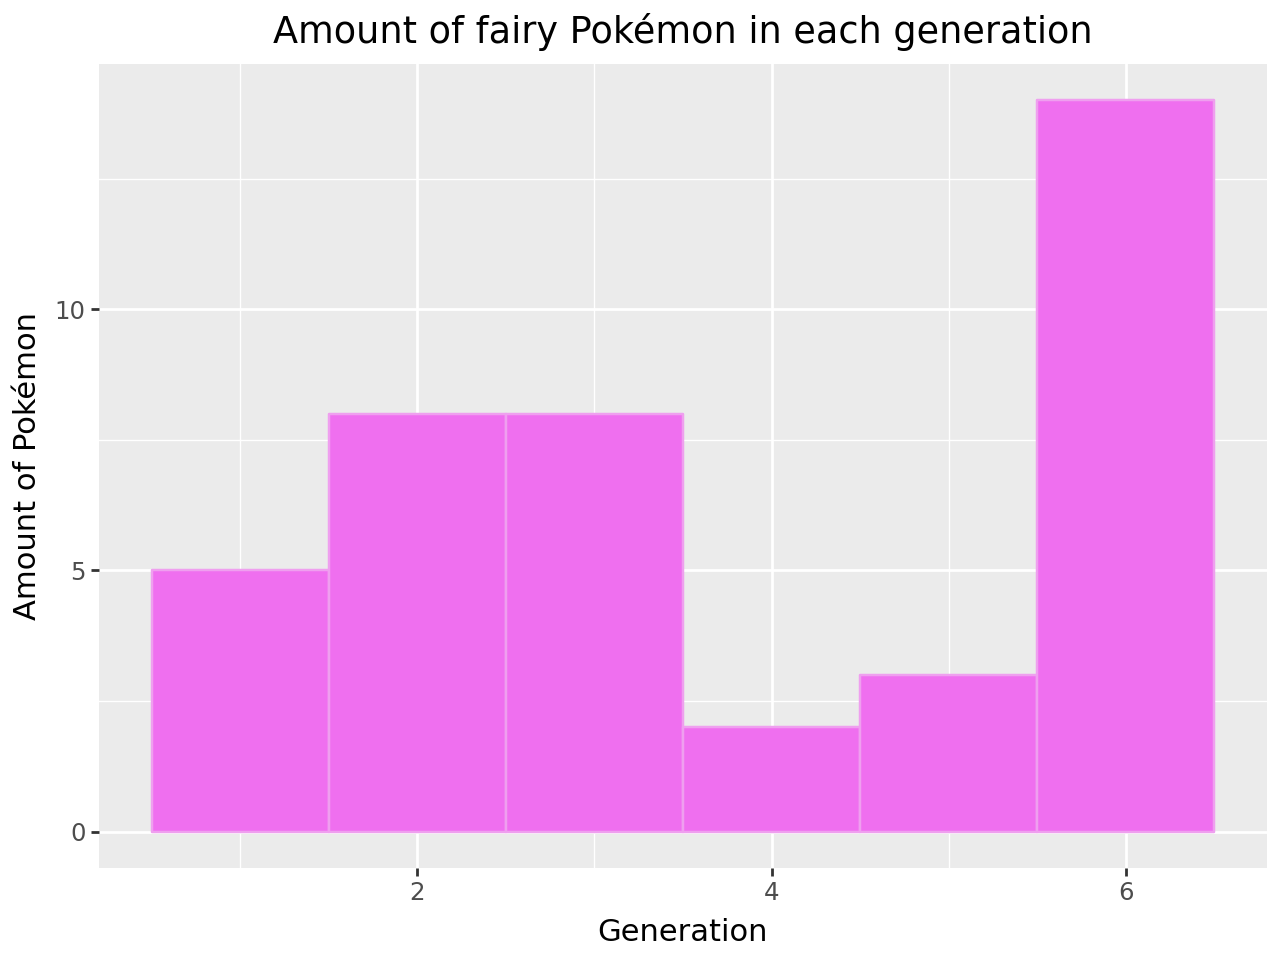

In [28]:
only_fairy = pnn.filter(col("Type 1").str.contains("Fairy") | col("Type 2").str.contains("Fairy"))

(
    ggplot(only_fairy.to_pandas())
    + aes(x="Generation") 
    + geom_histogram(bins=(6), color='#EF9FEF', fill='#EF6FEF')
    + labs(title="Amount of fairy Pokémon in each generation", y="Amount of Pokémon")
)